In [1]:
from fit_model_ import *

### This model is a Encoder Decoder

In [4]:
def define_encdec_model(src_vocab,tar_vocab,src_timesteps,tar_timesteps, n_units, g_units,function="softmax"):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length = src_timesteps,mask_zero=True))
    model.add(Bidirectional(GRU(g_units)))
    model.add(RepeatVector(tar_timesteps))
    model.add(Bidirectional(GRU(g_units,return_sequences=True)))
    model.add(TimeDistributed(Dense(tar_vocab,activation=function)))
    return model

### Variant 1

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 32)             72704     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              37632     
 l)                                                              
                                                                 
 repeat_vector (RepeatVector  (None, 8, 128)           0         
 )                                                               
                                                                 
 bidirectional_1 (Bidirectio  (None, 8, 128)           74496     
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 8, 4510)          581790    
 i

125/125 - 18s - loss: 1.3477 - acc: 0.7367 - val_loss: 2.1060 - val_acc: 0.7064 - 18s/epoch - 141ms/step
Epoch 33/100

Epoch 33: val_loss improved from 2.10598 to 2.09810, saving model to Models100\cp_model_3_1.h5
125/125 - 16s - loss: 1.3156 - acc: 0.7407 - val_loss: 2.0981 - val_acc: 0.7091 - 16s/epoch - 126ms/step
Epoch 34/100

Epoch 34: val_loss improved from 2.09810 to 2.09362, saving model to Models100\cp_model_3_1.h5
125/125 - 16s - loss: 1.2832 - acc: 0.7434 - val_loss: 2.0936 - val_acc: 0.7082 - 16s/epoch - 127ms/step
Epoch 35/100

Epoch 35: val_loss improved from 2.09362 to 2.08607, saving model to Models100\cp_model_3_1.h5
125/125 - 16s - loss: 1.2522 - acc: 0.7468 - val_loss: 2.0861 - val_acc: 0.7103 - 16s/epoch - 125ms/step
Epoch 36/100

Epoch 36: val_loss improved from 2.08607 to 2.08484, saving model to Models100\cp_model_3_1.h5
125/125 - 14s - loss: 1.2218 - acc: 0.7498 - val_loss: 2.0848 - val_acc: 0.7097 - 14s/epoch - 113ms/step
Epoch 37/100

Epoch 37: val_loss improv

Epoch 78/100

Epoch 78: val_loss did not improve from 2.04249
125/125 - 12s - loss: 0.4864 - acc: 0.8684 - val_loss: 2.0981 - val_acc: 0.7244 - 12s/epoch - 93ms/step
Epoch 79/100

Epoch 79: val_loss did not improve from 2.04249
125/125 - 12s - loss: 0.4792 - acc: 0.8700 - val_loss: 2.1016 - val_acc: 0.7226 - 12s/epoch - 98ms/step
Epoch 80/100

Epoch 80: val_loss did not improve from 2.04249
125/125 - 12s - loss: 0.4718 - acc: 0.8712 - val_loss: 2.1095 - val_acc: 0.7206 - 12s/epoch - 93ms/step
Epoch 81/100

Epoch 81: val_loss did not improve from 2.04249
125/125 - 11s - loss: 0.4638 - acc: 0.8728 - val_loss: 2.1113 - val_acc: 0.7206 - 11s/epoch - 89ms/step
Epoch 82/100

Epoch 82: val_loss did not improve from 2.04249
125/125 - 13s - loss: 0.4545 - acc: 0.8739 - val_loss: 2.1104 - val_acc: 0.7223 - 13s/epoch - 101ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 2.04249
125/125 - 12s - loss: 0.4478 - acc: 0.8757 - val_loss: 2.1129 - val_acc: 0.7222 - 12s/epoch - 93ms/step
Epo

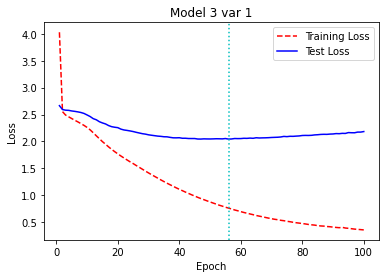

In [5]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 32
g_units = 64
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_3_1.h5'
history_save_file_name="cp_history_3_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model3_1 = define_encdec_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units, "softmax")
create_model(model3_1,loss_func,learning_rate)
plot_model(model3_1, to_file='model_images/cp_model_3_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_1, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model3_1.history, 'loss_vs_epochs_images_100/cp_model_3_1_le.png', 'Model 3 var 1')

### Variant 2

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 256)            581632    
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              296448    
 nal)                                                            
                                                                 
 repeat_vector_1 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 8, 256)           296448    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 4510)          1159070   


Epoch 38/100

Epoch 38: val_loss did not improve from 1.98828
125/125 - 18s - loss: 0.3196 - acc: 0.8965 - val_loss: 2.2640 - val_acc: 0.7270 - 18s/epoch - 142ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 1.98828
125/125 - 20s - loss: 0.3176 - acc: 0.8990 - val_loss: 2.2759 - val_acc: 0.7258 - 20s/epoch - 159ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 1.98828
125/125 - 19s - loss: 0.3192 - acc: 0.8981 - val_loss: 2.2703 - val_acc: 0.7282 - 19s/epoch - 151ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 1.98828
125/125 - 19s - loss: 0.3188 - acc: 0.8969 - val_loss: 2.2777 - val_acc: 0.7270 - 19s/epoch - 148ms/step
Epoch 42/100

Epoch 42: val_loss did not improve from 1.98828
125/125 - 18s - loss: 0.3188 - acc: 0.8970 - val_loss: 2.2832 - val_acc: 0.7287 - 18s/epoch - 140ms/step
Epoch 43/100

Epoch 43: val_loss did not improve from 1.98828
125/125 - 18s - loss: 0.3208 - acc: 0.8959 - val_loss: 2.2941 - val_acc: 0.7291 - 18s/epoch - 143ms/ste


Epoch 87: val_loss did not improve from 1.98828
125/125 - 19s - loss: 0.3168 - acc: 0.8918 - val_loss: 2.4079 - val_acc: 0.7234 - 19s/epoch - 151ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 1.98828
125/125 - 19s - loss: 0.3240 - acc: 0.8906 - val_loss: 2.4098 - val_acc: 0.7207 - 19s/epoch - 151ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 1.98828
125/125 - 19s - loss: 0.3401 - acc: 0.8866 - val_loss: 2.4140 - val_acc: 0.7207 - 19s/epoch - 154ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 1.98828
125/125 - 21s - loss: 0.3495 - acc: 0.8848 - val_loss: 2.4304 - val_acc: 0.7254 - 21s/epoch - 168ms/step
Epoch 91/100

Epoch 91: val_loss did not improve from 1.98828
125/125 - 20s - loss: 0.3550 - acc: 0.8828 - val_loss: 2.4264 - val_acc: 0.7224 - 20s/epoch - 158ms/step
Epoch 92/100

Epoch 92: val_loss did not improve from 1.98828
125/125 - 21s - loss: 0.3505 - acc: 0.8845 - val_loss: 2.4373 - val_acc: 0.7227 - 21s/epoch - 167ms/step
Epoch 93/10

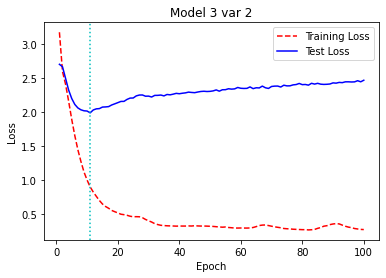

In [6]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
g_units = 128
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_3_2.h5'
history_save_file_name="cp_history_3_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model3_2 = define_encdec_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"softmax")
create_model(model3_2,loss_func,learning_rate)
plot_model(model3_2, to_file='model_images/cp_model_3_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_2, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model3_2.history, 'loss_vs_epochs_images_100/cp_model_3_2_le.png', 'Model 3 var 2')

### Variant 3

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 128)            290816    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                                 
 repeat_vector_2 (RepeatVect  (None, 8, 64)            0         
 or)                                                             
                                                                 
 bidirectional_5 (Bidirectio  (None, 8, 64)            18816     
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 8, 4510)          293150    


Epoch 33/100

Epoch 33: val_loss did not improve from 2.04628
63/63 - 10s - loss: 1.0943 - acc: 0.7690 - val_loss: 2.0523 - val_acc: 0.7065 - 10s/epoch - 162ms/step
Epoch 34/100

Epoch 34: val_loss improved from 2.04628 to 2.03949, saving model to Models100\cp_model_3_3.h5
63/63 - 10s - loss: 1.0652 - acc: 0.7728 - val_loss: 2.0395 - val_acc: 0.7115 - 10s/epoch - 164ms/step
Epoch 35/100

Epoch 35: val_loss did not improve from 2.03949
63/63 - 11s - loss: 1.0380 - acc: 0.7762 - val_loss: 2.0401 - val_acc: 0.7107 - 11s/epoch - 168ms/step
Epoch 36/100

Epoch 36: val_loss improved from 2.03949 to 2.03845, saving model to Models100\cp_model_3_3.h5
63/63 - 10s - loss: 1.0077 - acc: 0.7807 - val_loss: 2.0384 - val_acc: 0.7111 - 10s/epoch - 167ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 2.03845
63/63 - 10s - loss: 0.9800 - acc: 0.7850 - val_loss: 2.0407 - val_acc: 0.7161 - 10s/epoch - 155ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.03845
63/63 - 10s - loss:

63/63 - 10s - loss: 0.4640 - acc: 0.8718 - val_loss: 2.1610 - val_acc: 0.7122 - 10s/epoch - 159ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 2.03845
63/63 - 10s - loss: 0.4616 - acc: 0.8718 - val_loss: 2.1753 - val_acc: 0.7129 - 10s/epoch - 159ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 2.03845
63/63 - 10s - loss: 0.4524 - acc: 0.8737 - val_loss: 2.1798 - val_acc: 0.7107 - 10s/epoch - 157ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.03845
63/63 - 10s - loss: 0.4469 - acc: 0.8751 - val_loss: 2.1952 - val_acc: 0.7108 - 10s/epoch - 155ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.03845
63/63 - 10s - loss: 0.4428 - acc: 0.8748 - val_loss: 2.1888 - val_acc: 0.7119 - 10s/epoch - 158ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.03845
63/63 - 10s - loss: 0.4430 - acc: 0.8752 - val_loss: 2.1932 - val_acc: 0.7095 - 10s/epoch - 163ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.03845
63/63 - 10

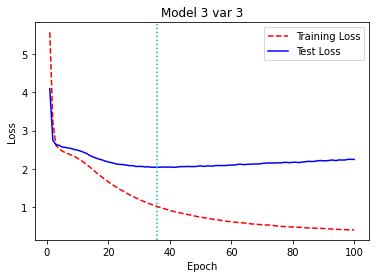

In [7]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 128
g_units=32
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=128
model_save_file_name='Models100/cp_model_3_3.h5'
history_save_file_name="cp_history_3_3.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model3_3 = define_encdec_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"sigmoid")
create_model(model3_3,loss_func,learning_rate)
plot_model(model3_3, to_file='model_images/cp_model_3_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_3, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model3_3.history, 'loss_vs_epochs_images_100/cp_model_3_3_le.png', 'Model 3 var 3')

### View

Text(0, 0.5, 'LOSS')

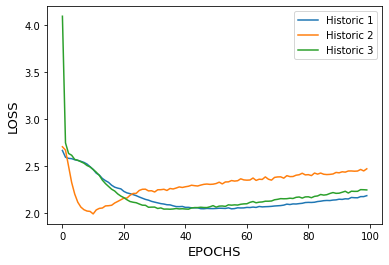

In [4]:
hist1 = load_history("History_100/cp_history_3_1.npy")
hist2 = load_history("History_100/cp_history_3_2.npy")
hist3 = load_history("History_100/cp_history_3_3.npy")
for x in ['val_loss']:
    plt.plot(hist1[x],label="Historic 1")
    plt.plot(hist2[x],label="Historic 2")
    plt.plot(hist3[x],label="Historic 3")
plt.legend()
plt.xlabel("EPOCHS",fontsize=13)
plt.ylabel("LOSS",fontsize=13)

### One Hot Encoding

2272 4510 5 8
(8000, 5) (8000, 8, 4510) (2000, 5) (2000, 8, 4510)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 256)            581632    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              296448    
 l)                                                              
                                                                 
 repeat_vector (RepeatVector  (None, 8, 256)           0         
 )                                                               
                                                                 
 bidirectional_1 (Bidirectio  (None, 8, 256)           296448    
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 8, 4510)          1

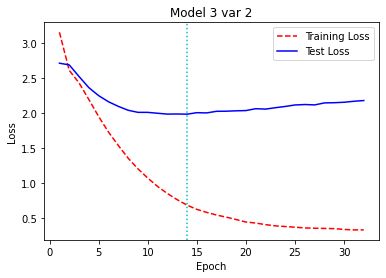

In [4]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
g_units = 128
learning_rate = 0.005
loss_func='categorical_crossentropy'
epochs=32
batch_size=64
model_save_file_name='Models/cp_model_ohe_3_2.h5'
history_save_file_name="cp_history_ohe_3_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=True)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=True)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model3_2_ohe = define_encdec_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"softmax")
create_model(model3_2_ohe,loss_func,learning_rate)
plot_model(model3_2_ohe, to_file='model_images/cp_model_ohe_3_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_2_ohe, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model3_2_ohe.history, 'loss_vs_epochs_images/cp_model_ohe_3_2_le.png', 'Model 3 var 2')

Text(0, 0.5, 'LOSS')

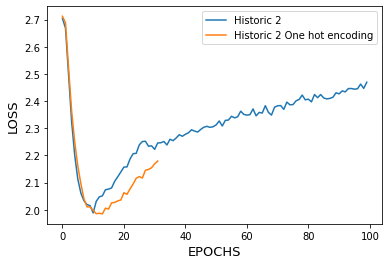

In [3]:
hist2 = load_history("History_100/cp_history_3_2.npy")
hist2OH = load_history("History_100/cp_history_ohe_3_2.npy")
for x in ['val_loss']:
    plt.plot(hist2[x],label="Historic 2")
    plt.plot(hist2OH[x],label="Historic 2 One hot encoding")
plt.legend()
plt.xlabel("EPOCHS",fontsize=13)
plt.ylabel("LOSS",fontsize=13)